# Logistic Regression as a Single Neuron Model

## Imports

In [2]:
import numpy as np
import h5py
import requests
import os
import matplotlib.pyplot as plt

## Helper Functions

In [3]:
def download_file(url, local_filename):
    """
    Downloads a file from a URL and saves it locally.
    """
    if not os.path.exists(local_filename):
        print(f"Downloading {local_filename}...")
        response = requests.get(url)
        if response.status_code == 200:
            with open(local_filename, 'wb') as f:
                f.write(response.content)
            print(f"File downloaded: {local_filename}")
        else:
            raise Exception(f"Failed to download file from {url}. Status code: {response.status_code}")
    else:
        print(f"File already exists: {local_filename}")

def load_dataset():
    # URLs of the .h5 files
    train_url = 'https://github.com/PyDataGBC/PyML2025/raw/refs/heads/main/LabWeek2/dataset/train_catvnoncat.h5'
    test_url = 'https://github.com/PyDataGBC/PyML2025/raw/refs/heads/main/LabWeek2/dataset/test_catvnoncat.h5'

    # Local file paths
    train_file = 'train_catvnoncat.h5'
    test_file = 'test_catvnoncat.h5'

    # Download the files if not already present
    download_file(train_url, train_file)
    download_file(test_url, test_file)

    # Open the files using h5py
    train_dataset = h5py.File(train_file, "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:])  # Train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:])  # Train set labels

    test_dataset = h5py.File(test_file, "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:])  # Test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:])  # Test set labels

    classes = np.array(test_dataset["list_classes"][:])  # List of classes

    # Reshape labels
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

## Importing Dataset

In [4]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

File downloaded: train_catvnoncat.h5
File downloaded: test_catvnoncat.h5


## Data Visualization

In [5]:
sample_image = train_set_x_orig[0]
print(sample_image.shape)
print(sample_image)

(64, 64, 3)
[[[17 31 56]
  [22 33 59]
  [25 35 62]
  ...
  [ 1 28 57]
  [ 1 26 56]
  [ 1 22 51]]

 [[25 36 62]
  [28 38 64]
  [30 40 67]
  ...
  [ 1 27 56]
  [ 1 25 55]
  [ 2 21 51]]

 [[32 40 67]
  [34 42 69]
  [35 42 70]
  ...
  [ 1 25 55]
  [ 0 24 54]
  [ 1 21 51]]

 ...

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]]


### **Exercise 1:** Take a look at five different images in test set. Try to see both cat and non-cat samples.

label:  [0]


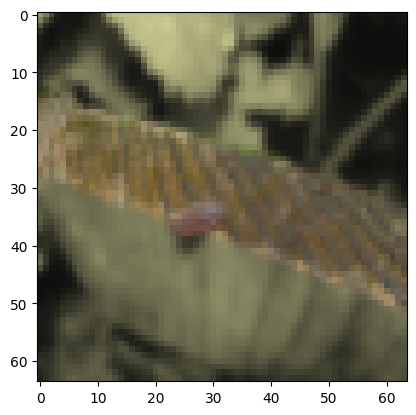

In [6]:
# Picture 1
index = 12
plt.imshow(train_set_x_orig[index])
print("label: ", train_set_y[:, index])

label:  [0]


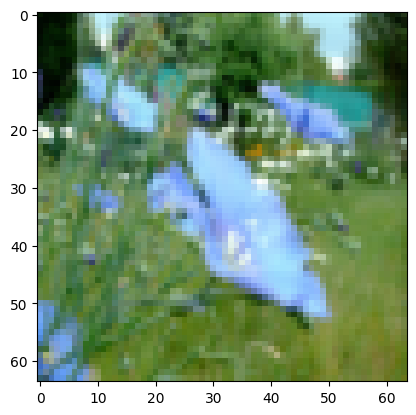

In [7]:
# Picture 2
index = 20
plt.imshow(train_set_x_orig[index])
print("label: ", train_set_y[:, index])

label:  [0]


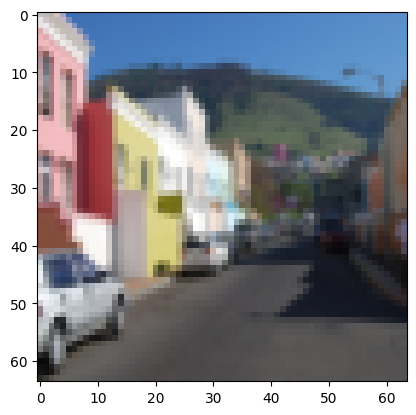

In [8]:
# Picture 3
index = 1
plt.imshow(train_set_x_orig[index])
print("label: ", train_set_y[:, index])

label:  [0]


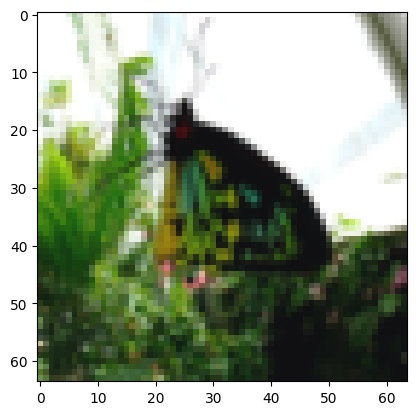

In [9]:
# Picture 4
index = 16
plt.imshow(train_set_x_orig[index])
print("label: ", train_set_y[:, index])

label:  [1]


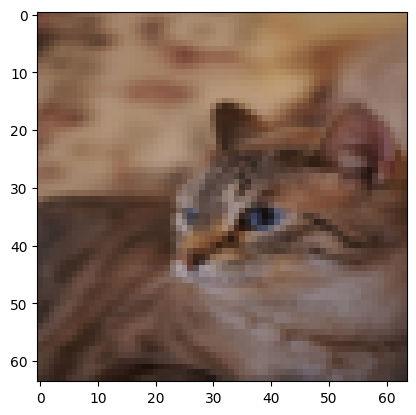

In [10]:
# Picture 5
index = np.random.randint(1, train_set_x_orig.shape[0])
plt.imshow(train_set_x_orig[index])
print("label: ", train_set_y[:, index])

### **Exercise 2:** What percentage of the pictures contain cats?

In [11]:
cat_image = 0
not_cat = 0
for i in range(train_set_x_orig.shape[0]):
    if 1 in train_set_y[:, i]:
        cat_image += 1
    else:
        not_cat += 1

print(f"Number of cat images: {cat_image}")
print(f"Number of non-cat images: {not_cat}")

perc_cat = cat_image / (cat_image + not_cat)
print(f"Percentage of cat images: {perc_cat}")

Number of cat images: 72
Number of non-cat images: 137
Percentage of cat images: 0.3444976076555024


## Data Preprocessing

### Numerical Representation of Images

![preprocessing](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek2/assets/imvectorkiank.png)

### Simple Numerical Example

![](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek2/assets/imtovec_example.webp)

In [12]:
airplane_image = np.array([[[255, 123, 135],[44, 12, 15],[56, 87, 90]],[[255, 133, 175],[24, 123, 169],[98, 66, 77]],[[66, 54, 88 ],[55, 98, 54],[87, 142, 89]]])
print(airplane_image.shape)
print(airplane_image)

(3, 3, 3)
[[[255 123 135]
  [ 44  12  15]
  [ 56  87  90]]

 [[255 133 175]
  [ 24 123 169]
  [ 98  66  77]]

 [[ 66  54  88]
  [ 55  98  54]
  [ 87 142  89]]]


In [13]:
airplane_flatten = airplane_image.flatten()
print(airplane_flatten.shape)
print(airplane_flatten)

(27,)
[255 123 135  44  12  15  56  87  90 255 133 175  24 123 169  98  66  77
  66  54  88  55  98  54  87 142  89]


### **Exercise 3:** Check the shape of the train and test datasets along with their labels. Try to interpret the numbers in the shapes.

**Notes:**
- The images are 64x64 `pixels`.
- There are 3 RGB `channels`.
- The train set contains 209 `batches` of images, and the test set contains 50 `batches` of images.

In [14]:
print(train_set_x_orig.shape)
print(train_set_y.shape)
print(test_set_x_orig.shape)
print(test_set_y.shape)

(209, 64, 64, 3)
(1, 209)
(50, 64, 64, 3)
(1, 50)


### Flattening the Train and Test Datasets

In [15]:
train_flat = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1)
print(train_flat.shape)

test_flat = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1)
print(test_flat.shape)

train_label = train_set_y[0]
print(train_label.shape)

test_label = test_set_y[0]
print(test_label.shape)



(209, 12288)
(50, 12288)
(209,)
(50,)


### Exercise 4: Why the dimension of flattened image is 12288?

In [16]:
# The reason the dimension of the flattened image is 12288 is because 12288 is the result of reshaping the image to 1D from 3D.
# 64 x 64 x 3 = 12288

## Implementing Logistic Regression

![](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek2/assets/LogReg_kiank.png)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


### **Exercise 5:** Train a `LogisticRegression` classifier to run a binary classification on the flattened cat pictures.

In [18]:
train_flat = train_flat / 255.0
test_flat = test_flat / 255.0

# Ensure labels are in the correct shape
train_label = train_label.reshape(-1)
test_label = test_label.reshape(-1)

# Initialize and train the Logistic Regression classifier
model = LogisticRegression(max_iter=1000)
model.fit(train_flat, train_label)

# Make predictions on the test set
test_predictions = model.predict(test_flat)

# Evaluate the model
accuracy = accuracy_score(test_label, test_predictions)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 70.00%


### **Exercise 6:** Evaluate your model manually

1. Choose a random index of an image.
2. Display the image.
3. Print the original label.
4. Print the predicted label.
5. Repeat this process multiple times to identify which pictures are more challenging for the model.

### **Exercise 7:** Report the overall accuracy of your classifier.

25
label:  [1]
prediction:  [1]


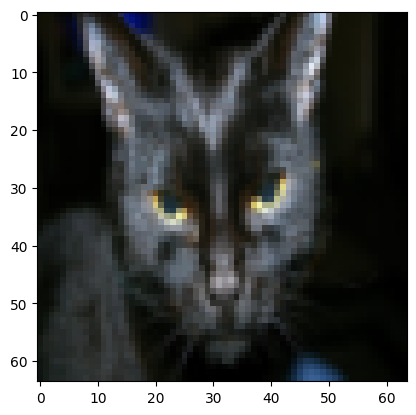

In [19]:
index = np.random.randint(0, test_flat.shape[0])
print(index)
plt.imshow(train_set_x_orig[index])
print("label: ", train_set_y[:, index])
picture = test_flat[index].reshape(1, -1)
print("prediction: ", model.predict(picture))

## MNIST dataset (Optional)

In [20]:
#import mnist dataset
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [21]:
x_train.shape

(60000, 28, 28)

Label:  5
Image Shape:  (28, 28)


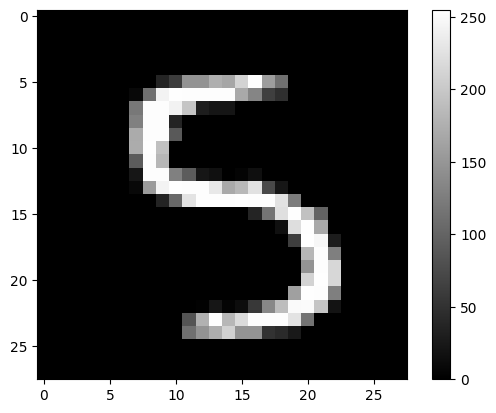

In [22]:
#Note: Run this cell multiple times
index = np.random.randint(0, x_train.shape[0])
print("Label: ", y_train[index])
print("Image Shape: ", x_train[index].shape)
plt.imshow(x_train[index], cmap='gray')
plt.colorbar()

### **Excercise 8:** What is the difference between a black-and-white image and a color image in terms of numerical representation?

your answer here:

### **Exercise 9:** Select one data sample and flatten it. What is the size of the flattened image and why?

In [23]:
index = np.random.randint(0, x_train.shape[0])
test_flat = x_train.reshape(x_train.shape[0], -1)
print(test_flat.shape)

(60000, 784)


### **Excercise 10:** Flatten the Entire Train and Test Datasets

In [25]:
train_flat = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1)
test_flat = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1)


print(f"Flattened train dataset shape: {train_flat.shape}")
print(f"Flattened test dataset shape: {test_flat.shape}")


Flattened train dataset shape: (209, 12288)
Flattened test dataset shape: (50, 12288)


**Some food for thought:** What would the architecture of my model be if I used more than one neuron to predict the label?